In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime
import tensorflow as tf
from datetime import date, timedelta
%matplotlib inline

In [56]:
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [57]:
bank="JPM"
stocks = data.DataReader(bank, 'yahoo', start, end)

In [58]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-12-31,39.169998,38.950001,39.080002,39.009998,5754000.0,24.427864
2005-01-03,39.689999,39.009998,39.480000,39.150002,14957900.0,24.515537
2005-01-04,39.060001,38.320000,38.980000,38.410000,11360900.0,24.262857
2005-01-05,38.919998,38.389999,38.599998,38.490002,9770200.0,24.313398
2005-01-06,38.980000,38.639999,38.770000,38.709999,9115900.0,24.452362


Text(0, 0.5, 'Opening Stock Price')

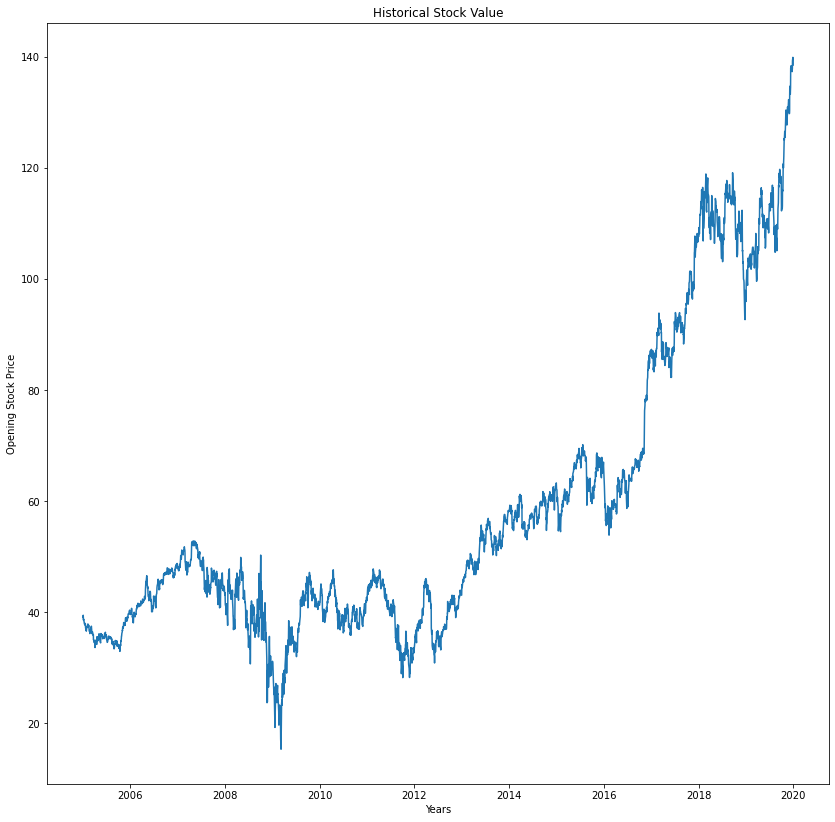

In [59]:
plt.figure(figsize=(14,14))
plt.plot(stocks['Open'])
plt.title('Historical Stock Value')
plt.xlabel('Years')
plt.ylabel('Opening Stock Price')

In [60]:
df=stocks.reset_index()['Open']

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [62]:
train_size=int(len(df)*0.70)
test_size=len(df)-train_size
train_data=df[0:train_size]
test_data=df[train_size:]

In [63]:
def make_dataset(data,timestep):
    X=[]
    y=[]
    n=len(data)
    for i in range(0,n-timestep-1):
        X.append(data[i:i+timestep])
        y.append(data[i+timestep])
    return np.array(X),np.array(y)

In [64]:
timestep=30
X_train,y_train=make_dataset(train_data,timestep)
X_test,y_test=make_dataset(test_data,timestep)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(40,return_sequences=True,input_shape=(timestep,1)))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam') ##Stacked LSTM

In [67]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Bidirectional
from keras.datasets import imdb 

In [68]:
modelBD = Sequential()
modelBD.add(Bidirectional(LSTM(64)))
modelBD.add(Dropout(0.5))
modelBD.add(Dense(1,activation='sigmoid'))
modelBD.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) ## Creating Bi-Directional LSTM

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 40)            6720      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 40)            12960     
_________________________________________________________________
lstm_6 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 32,681
Trainable params: 32,681
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(X_train,y_train,epochs=70,batch_size=40,verbose=1)

Epoch 1/70
66/66 [==============================] - 1s 22ms/step - loss: 6.9591e-05
Epoch 2/70
66/66 [==============================] - 1s 22ms/step - loss: 6.7744e-05
Epoch 3/70
66/66 [==============================] - 2s 23ms/step - loss: 6.8941e-05
Epoch 4/70
66/66 [==============================] - 1s 22ms/step - loss: 7.1775e-05
Epoch 5/70
66/66 [==============================] - 1s 23ms/step - loss: 6.6736e-05
Epoch 6/70
66/66 [==============================] - 2s 23ms/step - loss: 6.7629e-05
Epoch 7/70
66/66 [==============================] - 2s 23ms/step - loss: 7.0678e-05
Epoch 8/70
66/66 [==============================] - 2s 23ms/step - loss: 7.5129e-05
Epoch 9/70
66/66 [==============================] - 2s 23ms/step - loss: 6.7410e-05
Epoch 10/70
66/66 [==============================] - 2s 24ms/step - loss: 6.6838e-05
Epoch 11/70
66/66 [==============================] - 2s 23ms/step - loss: 7.1147e-05: 0s - loss: 7.
Epoch 12/70
66/66 [==============================] - 2s 24m

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error 

In [20]:
train_predict

array([[37.732616],
       [37.858795],
       [38.00351 ],
       ...,
       [70.01616 ],
       [69.60972 ],
       [68.288025]], dtype=float32)

In [21]:
test_predict

array([[ 68.05848],
       [ 68.37754],
       [ 68.59791],
       ...,
       [133.93199],
       [134.80692],
       [136.13922]], dtype=float32)

In [22]:
lookback=timestep
trainPlot=np.empty_like(df)
trainPlot[:,:]=np.nan
trainPlot[lookback:len(train_predict)+lookback, :]=train_predict

testPlot=np.empty_like(df)
testPlot[:, :]=np.nan
testPlot[len(train_predict)+(lookback*2)+1:len(df)-1, :]=test_predict

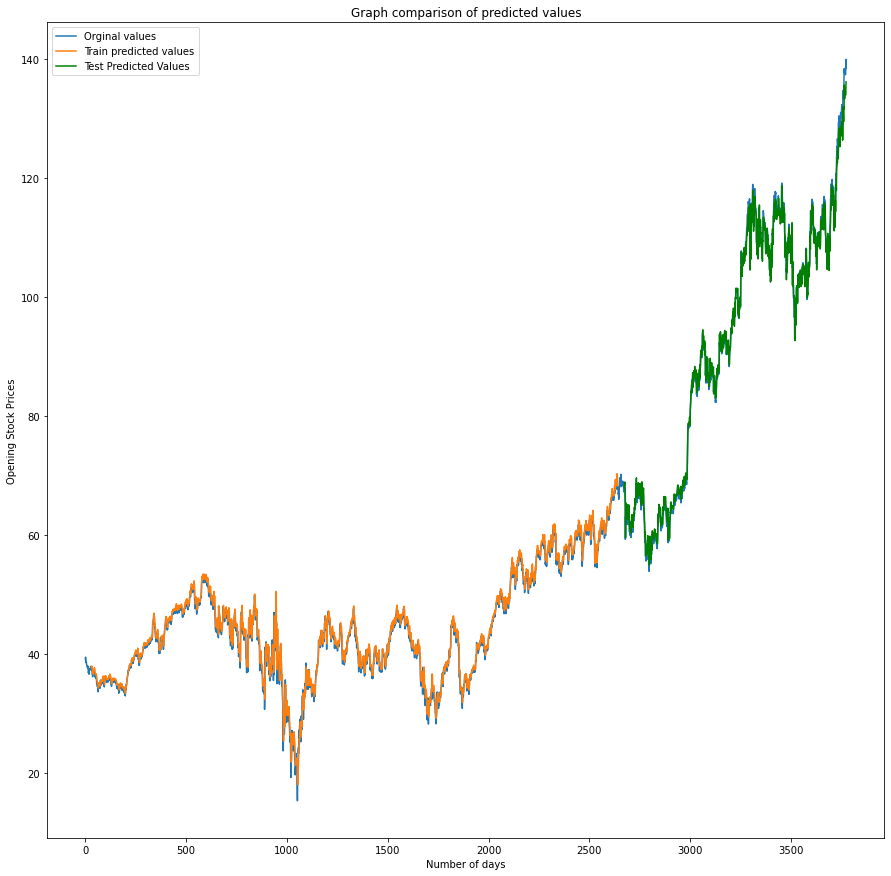

In [23]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPlot)
plt.plot(testPlot,color='g')
plt.title('Graph comparison of predicted values')
plt.xlabel('Number of days')
plt.ylabel('Opening Stock Prices')
plt.legend(['Orginal values','Train predicted values','Test Predicted Values'],loc=2)

In [24]:
def errorpercentage(y_test,pred):
    mape=np.mean(np.abs(y_test-pred)/y_test)*100
    return mape

In [25]:
print('Accuracy using Stacked LSTM',100-errorpercentage(scaler.inverse_transform(y_test),test_predict))

Accuracy using Stacked LSTM 98.69018437930396


In [26]:
a=test_data.shape[0]
x=test_data[a-timestep:]
scaler.inverse_transform(x)

array([[129.55999756],
       [130.99000549],
       [130.30000305],
       [130.        ],
       [130.1499939 ],
       [131.25      ],
       [131.82000732],
       [132.28999329],
       [131.86999512],
       [132.30999756],
       [129.77000427],
       [130.38000488],
       [132.67999268],
       [134.69000244],
       [134.63000488],
       [133.25      ],
       [134.28999329],
       [134.49000549],
       [137.94999695],
       [138.38000488],
       [137.72999573],
       [138.1499939 ],
       [137.75999451],
       [138.02000427],
       [137.6000061 ],
       [137.33000183],
       [137.88999939],
       [139.30000305],
       [139.8999939 ],
       [138.50999451]])

In [27]:
x.shape

(30, 1)

In [28]:
pred_stocks = data.DataReader(bank, 'yahoo', end+timedelta(1), end+timedelta(22))## reading data for next 15 days

In [29]:
pred_stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,141.100006,139.259995,139.789993,141.089996,10803700.0,131.047989
2020-01-03,139.229996,137.080002,137.500000,138.339996,10386800.0,129.318619
2020-01-06,138.270004,136.500000,136.559998,138.229996,10259000.0,129.215790
2020-01-07,137.860001,135.820007,137.279999,135.880005,10531300.0,127.019043
2020-01-08,137.580002,135.600006,135.699997,136.940002,9695300.0,128.009903
2020-01-09,138.229996,137.039993,138.050003,137.440002,9469000.0,128.477310
2020-01-10,137.250000,135.809998,137.210007,136.070007,10190900.0,127.196655
2020-01-13,137.199997,135.759995,136.190002,137.199997,12355200.0,128.252960
2020-01-14,140.759995,137.690002,137.940002,138.800003,24906000.0,129.748627


In [30]:
actual_values=[]
for i in pred_stocks['Open']:
    actual_values.append(i)
actual_values=np.array(actual_values)

In [31]:
actual_values

array([139.78999329, 137.5       , 136.55999756, 137.27999878,
       135.69999695, 138.05000305, 137.21000671, 136.19000244,
       137.94000244, 137.8500061 , 137.44999695, 137.53999329,
       137.19000244, 137.24000549, 135.71000671])

In [32]:
## Prediction for next 15 days
i=0
while(i<15):
    length_of_array=len(x)
    if(length_of_array==timestep):
        temp=x;
        temp=temp.reshape(1,timestep,1)
        yget=model.predict(temp)
        x=np.append(x,yget)
    else:
        temp=x[length_of_array-timestep:]
        temp=temp.reshape(1,timestep,1)
        yget=model.predict(temp)
        x=np.append(x,yget)
    i=i+1 

In [33]:
x=x.reshape(-1,1)
actual_values=actual_values.reshape(-1,1)
scaler.inverse_transform(x[timestep:])

array([[134.0448808 ],
       [129.55009397],
       [126.74046715],
       [125.60615061],
       [125.0403952 ],
       [124.14587208],
       [122.75584813],
       [121.21229583],
       [119.89802659],
       [118.95254013],
       [118.28027832],
       [117.7129716 ],
       [117.14317089],
       [116.5578496 ],
       [115.99689659]])

In [34]:
act,pred=actual_values[:i],scaler.inverse_transform(x[timestep:])

In [35]:
scaler.inverse_transform(x[timestep:])

array([[134.0448808 ],
       [129.55009397],
       [126.74046715],
       [125.60615061],
       [125.0403952 ],
       [124.14587208],
       [122.75584813],
       [121.21229583],
       [119.89802659],
       [118.95254013],
       [118.28027832],
       [117.7129716 ],
       [117.14317089],
       [116.5578496 ],
       [115.99689659]])

In [36]:
print('Accuracy for Future 15 days values',100-errorpercentage(act,pred))

Accuracy for Future 15 days values 89.03974558293372


In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
print('MSE for future 15 days values',mean_absolute_error(act,pred))

MSE for future 15 days values 15.037484981177764


In [39]:
y=len(df)-1460
Plotarr=np.empty([y+15,1])
Plotarr[::]=np.nan
Plotarr[y:]=pred

In [40]:
pred    ## stocks for the next 15 days 

array([[134.0448808 ],
       [129.55009397],
       [126.74046715],
       [125.60615061],
       [125.0403952 ],
       [124.14587208],
       [122.75584813],
       [121.21229583],
       [119.89802659],
       [118.95254013],
       [118.28027832],
       [117.7129716 ],
       [117.14317089],
       [116.5578496 ],
       [115.99689659]])

In [41]:
print('The above shows the predicted stock price for 15 days')

The above shows the predicted stock price for 15 days


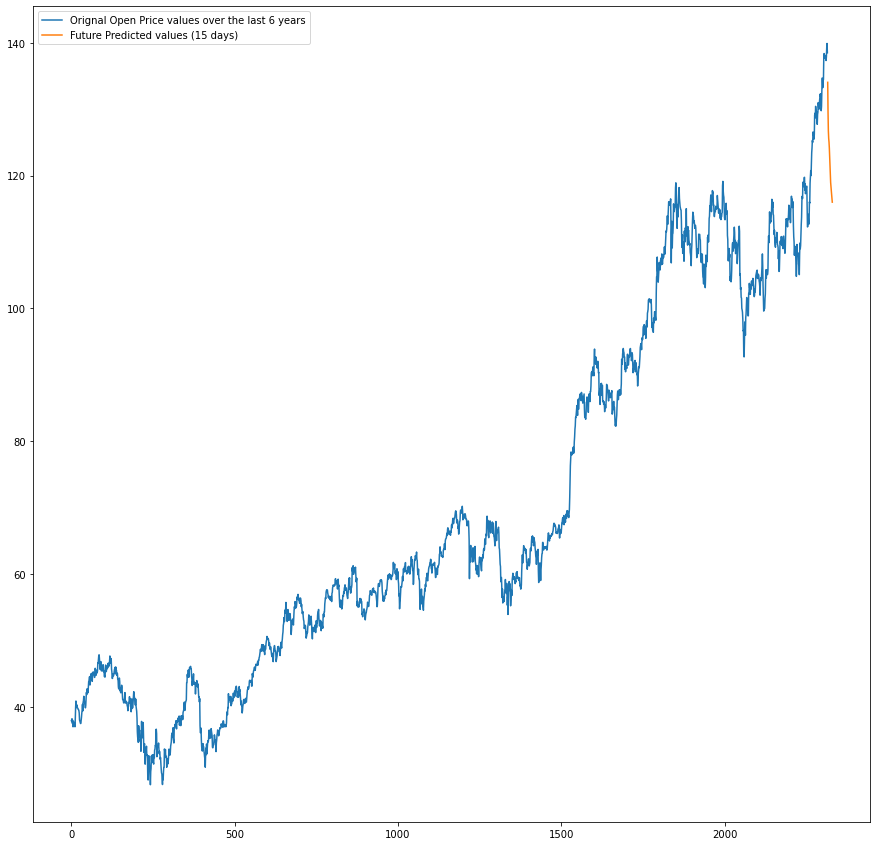

In [42]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(df[1460:])) ## for the 
plt.plot(Plotarr)
plt.legend(['Orignal Open Price values over the last 6 years','Future Predicted values (15 days)'],loc=2)

In [43]:
f=pd.DataFrame(pred,columns=['Open'])

In [44]:
string=bank+'Data'
dfnew=pd.read_csv(string)

In [45]:
dfnew['Open']=pred

In [46]:
dfnew.to_csv(string,index=False)

In [47]:
test=pd.read_csv(string)

In [48]:
dfnew

,Close,Open
0,140.916793,134.044881
1,142.286207,129.550094
2,143.321571,126.740467
3,144.144918,125.606151
4,144.893534,125.040395
5,145.631787,124.145872
6,146.362398,122.755848
7,147.064374,121.212296
8,147.720034,119.898027
9,148.323591,118.952540


In [49]:
modelBD.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=40,verbose=1)

Epoch 1/70
66/66 [==============================] - 4s 23ms/step - loss: 0.5726 - accuracy: 3.8285e-04 - val_loss: 1.2141 - val_accuracy: 0.0000e+00
Epoch 2/70
66/66 [==============================] - 1s 15ms/step - loss: 0.5413 - accuracy: 3.8285e-04 - val_loss: 0.7282 - val_accuracy: 0.0000e+00
Epoch 3/70
66/66 [==============================] - 1s 15ms/step - loss: 0.5297 - accuracy: 3.8285e-04 - val_loss: 0.6758 - val_accuracy: 9.0744e-04
Epoch 4/70
66/66 [==============================] - 1s 15ms/step - loss: 0.5296 - accuracy: 3.8285e-04 - val_loss: 0.6415 - val_accuracy: 9.0744e-04
Epoch 5/70
66/66 [==============================] - 1s 18ms/step - loss: 0.5289 - accuracy: 3.8285e-04 - val_loss: 0.6453 - val_accuracy: 9.0744e-04
Epoch 6/70
66/66 [==============================] - 1s 18ms/step - loss: 0.5291 - accuracy: 3.8285e-04 - val_loss: 0.6422 - val_accuracy: 9.0744e-04
Epoch 7/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5286 - accuracy: 3.8285e-04 - v

Epoch 56/70
66/66 [==============================] - 1s 17ms/step - loss: 0.5271 - accuracy: 3.8285e-04 - val_loss: 0.6166 - val_accuracy: 9.0744e-04
Epoch 57/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 3.8285e-04 - val_loss: 0.6144 - val_accuracy: 9.0744e-04
Epoch 58/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 3.8285e-04 - val_loss: 0.6120 - val_accuracy: 9.0744e-04
Epoch 59/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 3.8285e-04 - val_loss: 0.6147 - val_accuracy: 9.0744e-04
Epoch 60/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 3.8285e-04 - val_loss: 0.6155 - val_accuracy: 9.0744e-04
Epoch 61/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 3.8285e-04 - val_loss: 0.6155 - val_accuracy: 9.0744e-04
Epoch 62/70
66/66 [==============================] - 1s 17ms/step - loss: 0.5270 - accuracy: 3.8285e

In [50]:
train_predict=modelBD.predict(X_train)
test_predict=modelBD.predict(X_test)

In [51]:
trypredict=scaler.inverse_transform(test_predict)

In [52]:
trypredict

array([[ 68.549675],
       [ 68.40379 ],
       [ 68.297646],
       ...,
       [103.9289  ],
       [103.96465 ],
       [104.00929 ]], dtype=float32)

In [53]:
print('Accuracy using Bi-directional LSTM',100-errorpercentage(scaler.inverse_transform(y_test),trypredict))

Accuracy using Bi-directional LSTM 92.103042475466
